Import necessary libraries and load the data

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
bjj_matches = pd.read_csv('bjj_matches_with_elo.csv')

# Convert 'year' column to datetime format if it's not already
bjj_matches['year'] = pd.to_datetime(bjj_matches['year'], format='%Y')

# Display the first few rows of the data to check
bjj_matches.head()

,index,match_id,winner_id,winner_name,loser_id,loser_name,win_type,submission,winner_points,loser_points,adv_pen,weight_class,sex,stage,year,event_id,winner_elo_start,loser_elo_start,winner_elo_end,loser_elo_end
0,590,145,727,Alexandre de Freitas,-1,Robin Gracie,SUB,Choke,-1,-1,NaN,66KG,M,F,1998-01-01,1,1000.00,1000.0,1029.90,970.10
1,916,165,10579,Rodrigo Gracie,-1,Kareem Barkalev,POINTS,NaN,-1,-1,NaN,88KG,M,F,1998-01-01,2,1000.00,1000.0,1026.00,974.00
2,589,143,727,Alexandre de Freitas,5463,Marc,SUB,Armbar,-1,-1,NaN,66KG,M,SF,1998-01-01,3,1029.90,1000.0,1055.13,974.77
3,588,140,727,Alexandre de Freitas,5463,Trevor Lally,SUB,Armbar,-1,-1,NaN,66KG,M,4F,1998-01-01,4,1055.13,1000.0,1076.45,978.68
4,762,153,52,Renzo Gracie,-1,Frank Trigg,DECISION,NaN,-1,-1,NaN,77KG,M,R1,1998-01-01,5,1000.00,1000.0,1017.00,983.00


Prepare the data for plotting

In [11]:
# Melt the DataFrame to create a long-form version for easier plotting
elo_progress = bjj_matches[['year', 'winner_name', 'winner_elo_end', 'loser_name', 'loser_elo_end']]
elo_progress = pd.melt(elo_progress, id_vars=['year'], 
                       value_vars=['winner_elo_end', 'loser_elo_end'], 
                       var_name='fighter_type', 
                       value_name='elo_end')
elo_progress['fighter_name'] = bjj_matches[['winner_name', 'loser_name']].values.ravel('F')

# Remove rows with missing Elo ratings
elo_progress = elo_progress.dropna(subset=['elo_end'])

# Show the cleaned data for Elo progression
elo_progress.head()

,year,fighter_type,elo_end,fighter_name
0,1998-01-01,winner_elo_end,1029.90,Alexandre de Freitas
1,1998-01-01,winner_elo_end,1026.00,Rodrigo Gracie
2,1998-01-01,winner_elo_end,1055.13,Alexandre de Freitas
3,1998-01-01,winner_elo_end,1076.45,Alexandre de Freitas
4,1998-01-01,winner_elo_end,1017.00,Renzo Gracie


Plot Elo progression for big ADCC names

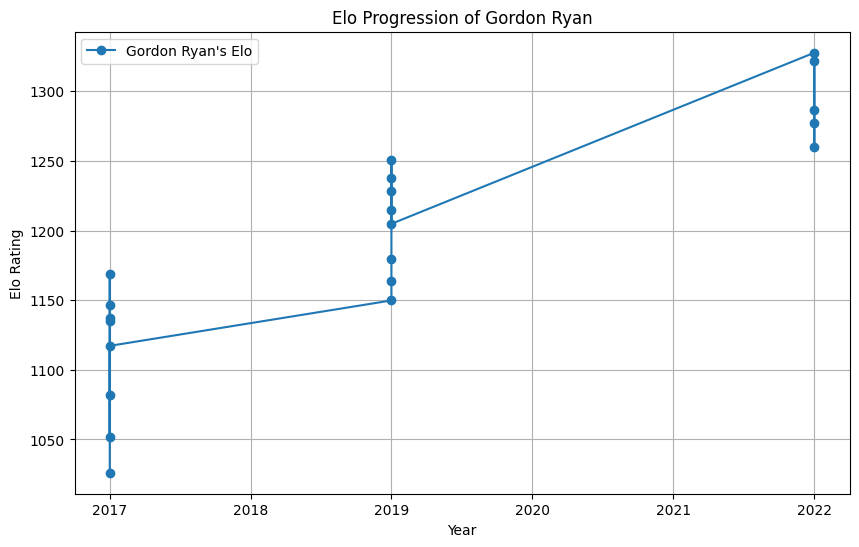

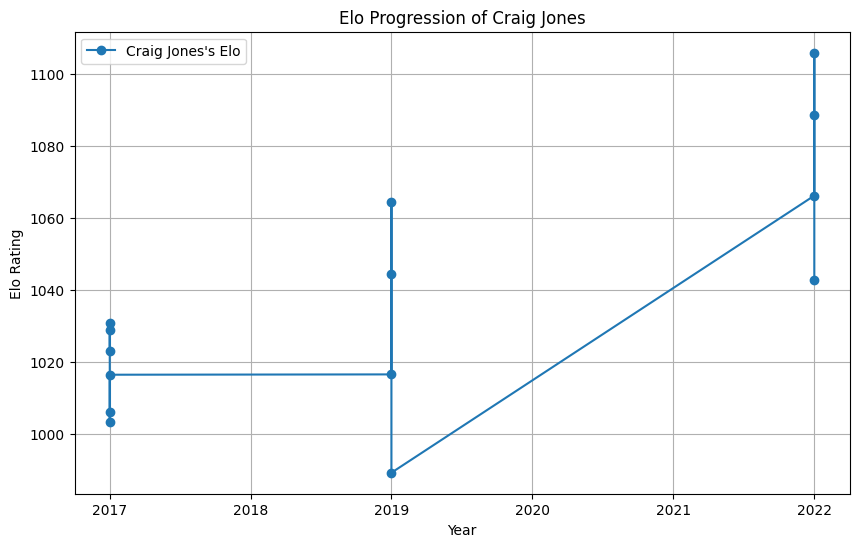

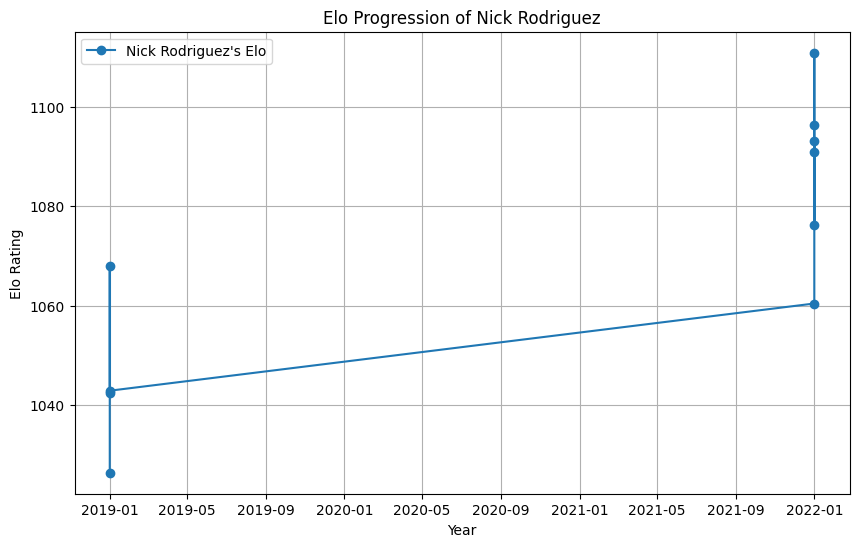

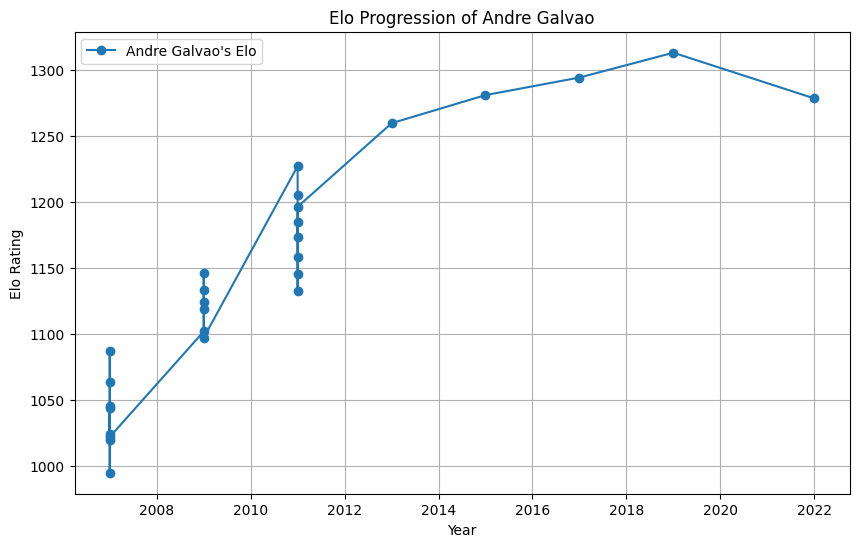

In [12]:
# List of fighters you want to plot (you can modify this list as needed)
selected_fighters = ['Gordon Ryan', 'Craig Jones', 'Nick Rodriguez', 'Andre Galvao']  # Example list

# Create a plot for each selected fighter
for fighter in selected_fighters:
    # Filter data for the specific fighter
    fighter_data = elo_progress[elo_progress['fighter_name'] == fighter].sort_values(by='year')
    
    # Create a plot for the fighter
    plt.figure(figsize=(10, 6))
    plt.plot(fighter_data['year'], fighter_data['elo_end'], marker='o', label=f"{fighter}'s Elo")
    plt.title(f"Elo Progression of {fighter}")
    plt.xlabel("Year")
    plt.ylabel("Elo Rating")
    plt.legend()
    plt.grid(True)
    plt.show()

Plot all fighters together in one plot

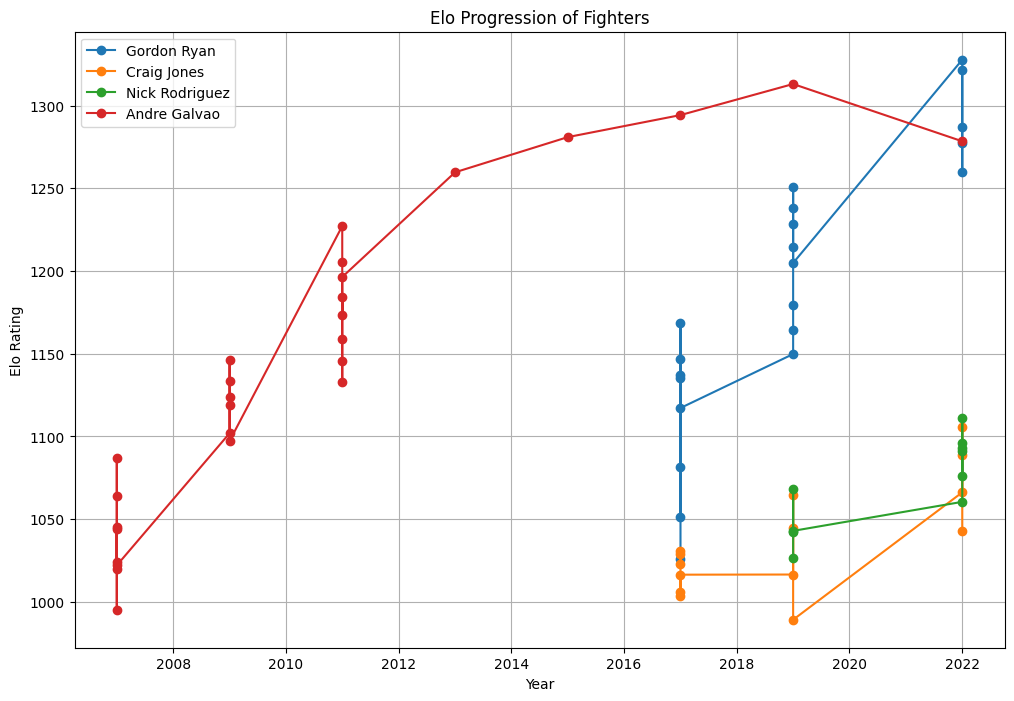

In [13]:
# Plot Elo progression for multiple fighters in one chart
plt.figure(figsize=(12, 8))

for fighter in selected_fighters:
    fighter_data = elo_progress[elo_progress['fighter_name'] == fighter].sort_values(by='year')
    plt.plot(fighter_data['year'], fighter_data['elo_end'], marker='o', label=f"{fighter}")

plt.title("Elo Progression of Fighters")
plt.xlabel("Year")
plt.ylabel("Elo Rating")
plt.legend()
plt.grid(True)
plt.show()